In [1]:
import os
os.chdir('/Users/VSR/Desktop/AIT')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout,LSTM,Input, Add, ReLU, Conv1D, BatchNormalization
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import LearningRateScheduler
from tabulate import tabulate


In [3]:
df = pd.read_csv("TrainingSamplesLabeled.csv" , names = ["Band1","Band2","Band3", "Band4", "Band5", "Band7", "Class"],header=None)

In [4]:
# Display the first few rows and a summary of the dataset
df.head()

,Band1,Band2,Band3,Band4,Band5,Band7,Class
0,161,160,164,166,202,196,13
1,126,125,130,89,124,134,1
2,87,93,111,166,140,126,8
3,67,63,87,84,81,74,2
4,118,106,120,48,143,150,1


In [5]:
df.describe() 

,Band1,Band2,Band3,Band4,Band5,Band7,Class
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,112.757067,114.433400,116.328867,119.829000,118.969933,117.813000,6.863467
std,44.445430,44.678214,45.044541,48.258856,45.469692,44.006775,4.582935
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,81.000000,87.000000,87.000000,85.000000,88.000000,89.000000,2.000000
50%,114.000000,114.000000,117.000000,118.000000,118.000000,119.000000,6.000000
75%,143.000000,142.000000,146.000000,151.000000,150.000000,148.000000,12.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,14.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Band1   15000 non-null  int64
 1   Band2   15000 non-null  int64
 2   Band3   15000 non-null  int64
 3   Band4   15000 non-null  int64
 4   Band5   15000 non-null  int64
 5   Band7   15000 non-null  int64
 6   Class   15000 non-null  int64
dtypes: int64(7)
memory usage: 820.4 KB


In [7]:
class_counts = df['Class'].value_counts()
class_percentages = class_counts / len(df) * 100

In [8]:
# Combine counts and percentages into a DataFrame
class_info = pd.DataFrame({'Class': class_counts.index, 'Count': class_counts.values, 'Percentage': class_percentages.values})

# Sort DataFrame by class counts
class_info = class_info.sort_values(by='Percentage', ascending=False)


# Print class information
print(class_info.to_string(index=False))

 Class  Count  Percentage
    13   3008   20.053333
     1   2547   16.980000
     2   1523   10.153333
     8   1275    8.500000
     4   1185    7.900000
    12   1159    7.726667
     6    945    6.300000
     3    796    5.306667
     7    711    4.740000
     5    639    4.260000
    11    574    3.826667
    10    431    2.873333
    14    138    0.920000
     9     69    0.460000


# Exploratory Data Analysis

In [9]:
# Mapping real names to class labels
class_names = {
    1: 'Scotch pine',
    2: 'Douglas fir',
    3: 'Pine/fir',
    4: 'Mixed pine fir',
    5: 'Supple/prickle pine',
    6: 'Aspen/mixed pine forest',
    7: 'Without vegetation',
    8: 'Aspen',
    9: 'Water',
    10: 'Moist meadow',
    11: 'Bushland',
    12: 'Grass/pastureland',
    13: 'Dry meadow',
    14: 'Alpine vegetation'
}


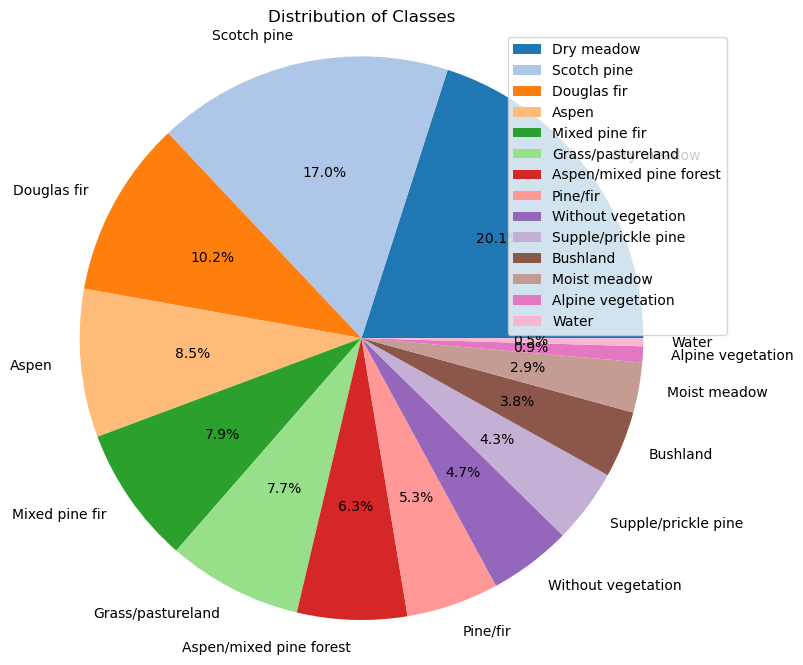

In [10]:
# Define a colormap with enough colors for all classes
colors = plt.cm.tab20.colors  # You can choose any other colormap as well

# Plot a pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
class_counts = df['Class'].value_counts()
plt.pie(class_counts, labels=[class_names[i] for i in class_counts.index], autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

plt.show()


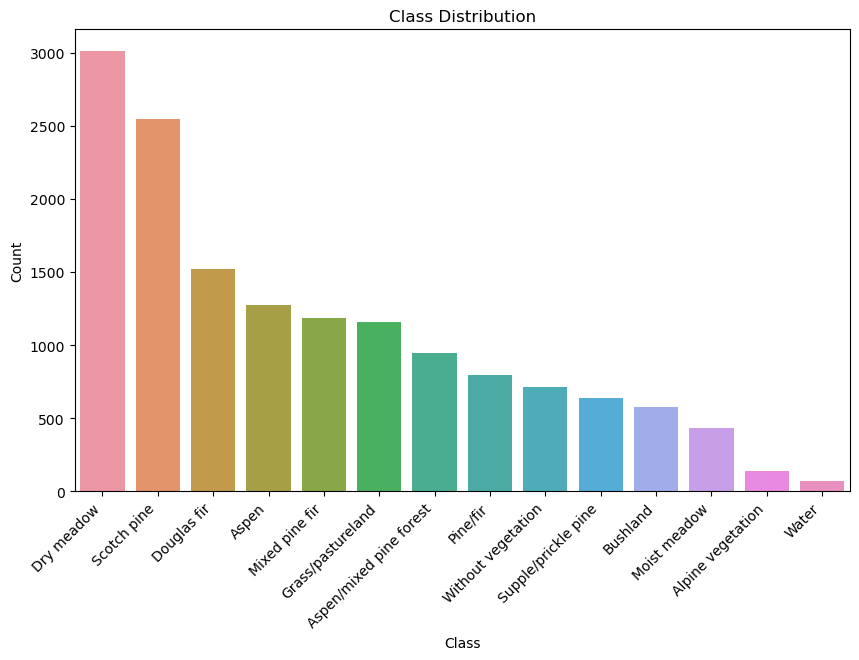

In [11]:
# Plot the Class Distribution with real names
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Class', order=df['Class'].value_counts().index)
plt.title("Class Distribution")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Count")
plt.gca().set_xticklabels([class_names[label] for label in df['Class'].value_counts().index])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

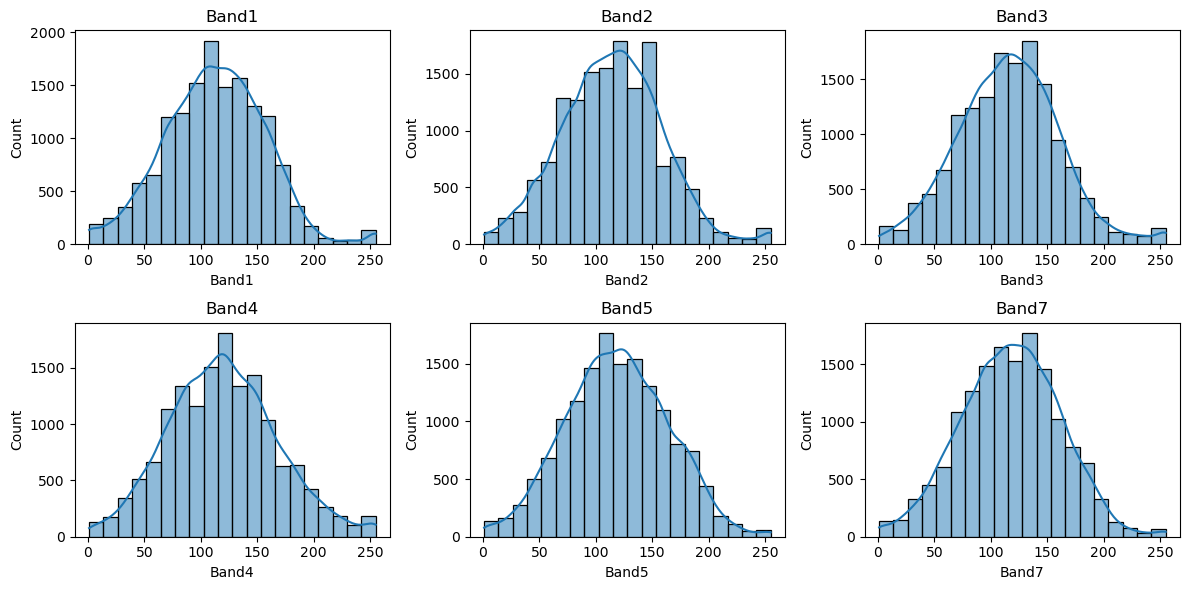

In [12]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    # Convert infinity values to NaN before plotting
    sns.histplot(df[col].replace([np.inf, -np.inf], np.nan), bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


In [13]:
df.corr()

,Band1,Band2,Band3,Band4,Band5,Band7,Class
Band1,1.000000,0.958130,0.949664,0.470746,0.809951,0.848696,0.583684
Band2,0.958130,1.000000,0.968348,0.585319,0.837775,0.861944,0.636341
Band3,0.949664,0.968348,1.000000,0.484174,0.825306,0.882802,0.581080
Band4,0.470746,0.585319,0.484174,1.000000,0.568032,0.430784,0.664157
Band5,0.809951,0.837775,0.825306,0.568032,1.000000,0.956948,0.677712
Band7,0.848696,0.861944,0.882802,0.430784,0.956948,1.000000,0.589041
Class,0.583684,0.636341,0.581080,0.664157,0.677712,0.589041,1.000000


In [15]:
#seperate the dependent and independent variable 
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

Text(0.5, 1.0, 'Correlation of all the features with the dependent variable')

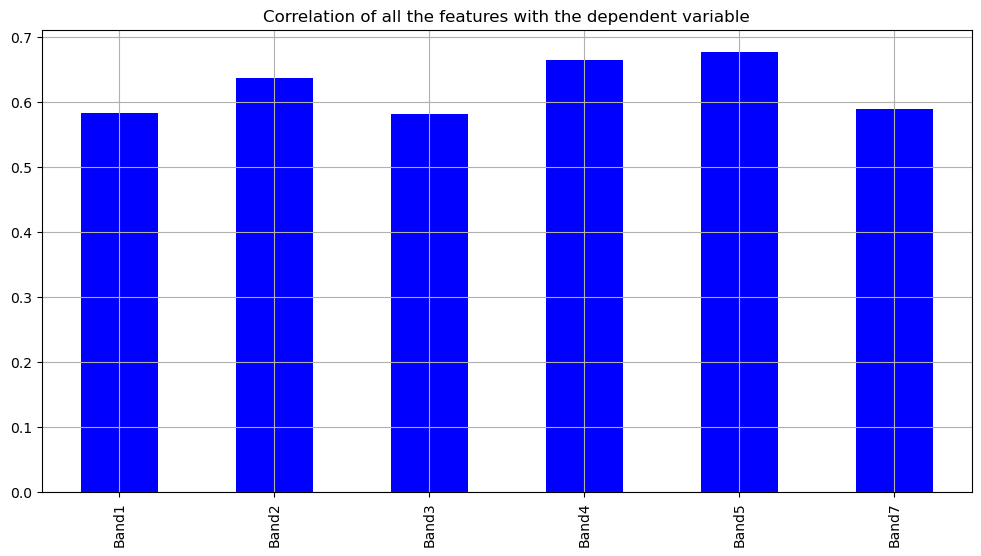

In [16]:
# correlation between features and target
X.corrwith(y).plot(kind = 'bar' ,  figsize = (12,6),color = 'blue', grid = True)
plt.title('Correlation of all the features with the dependent variable')

In [17]:
#split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 132)

In [18]:
#scaling the data 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
seed = 132 

# Create an empty list to store models
models = []

# Add Random Forest to the list
models.append(('RF', RandomForestClassifier(random_state=seed)))

# Add Decision Tree to the list
models.append(('CART', DecisionTreeClassifier(random_state=seed)))

# Add Support Vector Machine (SVM) to the list
models.append(('SVM', SVC(gamma='auto', random_state=seed)))



In [23]:
# evaluate each model
#compare accuracy f1 scores and generate classification report
for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, pred)
    report = classification_report(y_test, pred)
    f1_scores = f1_score(y_test,pred, average= 'macro')
    
    print(f"{name} Accuracy:", accuracy)
    print(f"Classification Report ({name}):\n", report)
    print(f"{name} F1 score:", f1_scores)
    print("\n")


RF Accuracy: 0.9323333333333333
Classification Report (RF):
               precision    recall  f1-score   support

           1       0.95      0.95      0.95       491
           2       0.93      0.95      0.94       298
           3       0.92      0.95      0.94       168
           4       0.95      0.90      0.92       241
           5       0.89      0.90      0.90       135
           6       0.90      0.88      0.89       196
           7       0.90      0.79      0.84       156
           8       0.92      0.96      0.94       240
           9       1.00      0.83      0.91        18
          10       0.92      0.92      0.92        85
          11       0.95      0.90      0.93       111
          12       0.88      0.96      0.91       225
          13       0.97      0.97      0.97       600
          14       0.92      0.94      0.93        36

    accuracy                           0.93      3000
   macro avg       0.93      0.91      0.92      3000
weighted avg       

In [24]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for each model
param_grid_rf = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
param_grid_cart = {"max_depth": [3, None],
              "max_features": list(range(1, 9)),
              "min_samples_leaf": list(range(1, 9)),
              "criterion": ["gini", "entropy"]}
param_grid_svm = {'C': [0.001, 0.01, 0.1, 1], 'gamma': ['scale', 'auto'] , 'kernel': ['linear', 'rbf', 'poly']}

# Create a dictionary of parameter grids for each model
param_grids = { 'RF': param_grid_rf, 'CART': param_grid_cart, 'SVM': param_grid_svm}

# Create an empty dictionary to store the best models
best_models = {}

# Loop through each model and perform grid search with k-fold cross-validation
for name, model in models:
    param_grid = param_grids[name]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=seed), scoring='accuracy')
    grid_result = grid_search.fit(X_train, y_train)
    best_models[name] = grid_result.best_estimator_

# Evaluate the best models
for name, model in best_models.items():
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    report = classification_report(y_test, pred)
    f1_scores = f1_score(y_test, pred, average='macro')
    
    print(f"Best {name} Accuracy:", accuracy)
    print(f"Best {name} Classification Report:\n", report)
    print(f"Best {name} F1 score:", f1_scores)
    print("\n")



Best RF Accuracy: 0.9313333333333333
Best RF Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.95      0.96       491
           2       0.92      0.95      0.93       298
           3       0.91      0.92      0.92       168
           4       0.93      0.89      0.91       241
           5       0.92      0.91      0.92       135
           6       0.91      0.89      0.90       196
           7       0.89      0.79      0.84       156
           8       0.91      0.95      0.93       240
           9       1.00      0.72      0.84        18
          10       0.91      0.93      0.92        85
          11       0.94      0.91      0.92       111
          12       0.89      0.94      0.91       225
          13       0.96      0.98      0.97       600
          14       0.94      0.94      0.94        36

    accuracy                           0.93      3000
   macro avg       0.93      0.91      0.92      3000
weighted av

In [21]:
'''
# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

# Create SVM model
svm_model = SVC(random_state=22)

# Create GridSearchCV instance
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and best score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

# Train the SVM model with the best parameters
best_svm_model = SVC(**best_params_svm, random_state=seed)
best_svm_model.fit(X_train, y_train)

# Evaluate the best SVM model
svm_pred = best_svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_f1_scores = f1_score(y_test, svm_pred, average='macro')

# Print the results
print("Best Parameters for SVM:", best_params_svm)
print("Best Score for SVM:", best_score_svm)
print("Best SVM Accuracy:", svm_accuracy)
print("Best SVM Classification Report:\n", svm_report)
print("Best SVM F1 Score:", svm_f1_scores)
'''

Best Parameters for SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score for SVM: 0.97625
Best SVM Accuracy: 0.978
Best SVM Classification Report:
               precision    recall  f1-score   support

           1       0.99      0.98      0.98       491
           2       0.98      1.00      0.99       298
           3       0.95      0.96      0.96       168
           4       0.98      0.96      0.97       241
           5       0.95      0.99      0.97       135
           6       0.99      0.98      0.98       196
           7       0.99      0.92      0.96       156
           8       0.96      0.98      0.97       240
           9       0.94      0.83      0.88        18
          10       0.98      0.96      0.97        85
          11       0.96      0.96      0.96       111
          12       0.97      0.99      0.98       225
          13       0.99      0.99      0.99       600
          14       0.94      0.94      0.94        36

    accuracy                   

# CNN

In [25]:
# Extract features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [26]:
# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
# One-hot encode labels
y_encoded = pd.get_dummies(y).values


In [28]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=132)


In [29]:
# Reshape input data to fit the model's expected input
X_train_reshaped = X_train.reshape((X_train.shape[0], 6, 1))
X_val_reshaped = X_val.reshape((X_val.shape[0], 6, 1))



In [30]:
# Define the CNN model architecture
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(6, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(14, activation='softmax')
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Compile the model
cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [32]:
# Train the model
history = cnn_model.fit(
    X_train_reshaped, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_reshaped, y_val)
)


Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - accuracy: 0.2868 - loss: 2.1378 - val_accuracy: 0.7437 - val_loss: 0.8449
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.6963 - loss: 0.8582 - val_accuracy: 0.8473 - val_loss: 0.5250
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.7641 - loss: 0.6385 - val_accuracy: 0.8670 - val_loss: 0.4383
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.7971 - loss: 0.5489 - val_accuracy: 0.8537 - val_loss: 0.4060
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.8150 - loss: 0.5056 - val_accuracy: 0.8947 - val_loss: 0.3448
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.8324 - loss: 0.4476 - val_accuracy: 0.9127 - val_loss: 0.3106
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.8440 - loss: 0.4252 - val_accuracy: 0.9117 - val_loss: 0.3069
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.8420 - loss: 0

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.9148 - loss: 0.2327 - val_accuracy: 0.9467 - val_loss: 0.1571
Epoch 51/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.9108 - loss: 0.2390 - val_accuracy: 0.9350 - val_loss: 0.1862
Epoch 52/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.9200 - loss: 0.2210 - val_accuracy: 0.9493 - val_loss: 0.1608
Epoch 53/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.9147 - loss: 0.2309 - val_accuracy: 0.9437 - val_loss: 0.1607
Epoch 54/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.9211 - loss: 0.2224 - val_accuracy: 0.9227 - val_loss: 0.1978
Epoch 55/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.9224 - loss: 0.2126 - val_accuracy: 0.9390 - val_loss: 0.1776
Epoch 56/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.9168 - loss: 0.2137 - val_accuracy: 0.9300 - val_loss: 0.1800
Epoch 57/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.9227 - loss: 0.2107

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.9314 - loss: 0.1881 - val_accuracy: 0.9620 - val_loss: 0.1291
Epoch 100/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.9403 - loss: 0.1778 - val_accuracy: 0.9407 - val_loss: 0.1523


In [33]:
# Evaluate the model
test_loss, cnn_test_acc = cnn_model.evaluate(X_val_reshaped, y_val)
print('Test accuracy:', cnn_test_acc)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.9418 - loss: 0.1675
Test accuracy: 0.940666675567627


In [34]:
from sklearn.metrics import classification_report, f1_score

y_pred = cnn_model.predict(X_val_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Calculate classification report
report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", report)

# Calculate F1 Score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print("Weighted F1 Score:", f1)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       491
           1       0.97      0.99      0.98       298
           2       0.92      0.98      0.95       168
           3       0.97      0.94      0.96       241
           4       0.83      0.99      0.91       135
           5       0.99      0.92      0.95       196
           6       0.88      0.84      0.86       156
           7       0.91      0.95      0.93       240
           8       1.00      0.78      0.88        18
           9       0.82      0.98      0.89        85
          10       0.89      0.92      0.90       111
          11       0.93      0.82      0.87       225
          12       0.96      0.99      0.98       600
          13       0.88      1.00      0.94        36

    accuracy                           0.94      3000
   macro avg       0.92      0.93      0.92      3000
weighted avg   

# LTSM

In [35]:
# Define the LSTM model architecture
lstm_model = Sequential([
    LSTM(50, input_shape=(6, 1), return_sequences=True),
    LSTM(50, return_sequences=False),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(14, activation='softmax')
])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:

# Compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [37]:
# Train the model
lstm_history = lstm_model.fit(
    X_train_reshaped, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_reshaped, y_val)
)



Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2839 - loss: 2.1647 - val_accuracy: 0.5507 - val_loss: 1.2048
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5242 - loss: 1.2653 - val_accuracy: 0.5510 - val_loss: 1.1124
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5503 - loss: 1.1573 - val_accuracy: 0.5730 - val_loss: 1.0468
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5947 - loss: 1.0338 - val_accuracy: 0.7093 - val_loss: 0.8032
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6868 - loss: 0.8553 - val_accuracy: 0.7310 - val_loss: 0.7086
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7037 - loss: 0.7849 - val_accuracy: 0.7427 - val_loss: 0.6637
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7155 - loss: 0.7299 - val_accuracy: 0.7300 - val_loss: 0.6789
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7186 - loss: 0.7245 - val_accu

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9357 - loss: 0.1809 - val_accuracy: 0.9423 - val_loss: 0.1574
Epoch 52/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9252 - loss: 0.2066 - val_accuracy: 0.9417 - val_loss: 0.1537
Epoch 53/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9265 - loss: 0.1879 - val_accuracy: 0.9403 - val_loss: 0.1636
Epoch 54/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9275 - loss: 0.1817 - val_accuracy: 0.9273 - val_loss: 0.1805
Epoch 55/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9167 - loss: 0.2044 - val_accuracy: 0.8910 - val_loss: 0.2949
Epoch 56/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9297 - loss: 0.1882 - val_accuracy: 0.9463 - val_loss: 0.1452
Epoch 57/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9354 - loss: 0.1766 - val_accuracy: 0.8907 - val_loss: 0.2983
Epoch 58/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9286 - loss: 0.1981 - val_accuracy:

In [38]:
# Evaluate the model
test_loss, lstm_test_acc = lstm_model.evaluate(X_val_reshaped, y_val)
print('Test accuracy:', lstm_test_acc)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.9571 - loss: 0.1320
Test accuracy: 0.9573333263397217


# ResNet

In [39]:
def residual_block(x, filters, kernel_size=3):
    # Shortcut
    shortcut = x

    # First convolution
    x = Conv1D(filters, kernel_size=kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Second convolution
    x = Conv1D(filters, kernel_size=kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    # Add shortcut to the output (skip connection)
    x = Add()([x, shortcut])
    x = ReLU()(x)

    return x


In [40]:
def build_resnet(input_shape, num_classes, num_blocks=4):
    inputs = Input(shape=input_shape)

    # Initial layer
    x = Conv1D(64, kernel_size=7, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)

    # Residual blocks
    for _ in range(num_blocks):
        x = residual_block(x, 64)

    # Output layer
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create a ResNet model
resnet_model = build_resnet(input_shape=(6, 1), num_classes=14)
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 6, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 6, 64)     │        512 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 6, 64)     │        256 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 6, 64)     │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 3, 64)     │          0 │ re_lu[0][0]       │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 3, 64)     │     12,352 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 3, 64)     │        256 │ conv1d_3[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 3, 64)     │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 3, 64)     │     12,352 │ re_lu_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 3, 64)     │        256 │ conv1d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 3, 64)     │          0 │ batch_normalizat… │
│                     │                   │            │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 3, 64)     │          0 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 3, 64)     │     12,352 │ re_lu_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 3, 64)     │        256 │ conv1d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 3, 64)     │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 3, 64)     │     12,352 │ re_lu_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 3, 64)     │        256 │ conv1d_6[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 3, 64)     │          0 │ batch_normalizat… │
│                     │                   │            │ re_lu_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_4 (ReLU)      │ (None, 3, 64)     │          0 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 3, 64)     │     12,352 │ re_lu_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 128,142 (500.55 KB)

 Trainable params: 126,990 (496.05 KB)

 Non-trainable params: 1,152 (4.50 KB)

In [41]:
# Training the ResNet model
resnet_history = resnet_model.fit(
    X_train_reshaped, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_reshaped, y_val)
)



Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6130 - loss: 1.3005 - val_accuracy: 0.2023 - val_loss: 2.7193
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7422 - loss: 0.7407 - val_accuracy: 0.7983 - val_loss: 0.5373
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7496 - loss: 0.6904 - val_accuracy: 0.8390 - val_loss: 0.4388
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7720 - loss: 0.6066 - val_accuracy: 0.8460 - val_loss: 0.4117
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7948 - loss: 0.5572 - val_accuracy: 0.8480 - val_loss: 0.3763
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7867 - loss: 0.5696 - val_accuracy: 0.8007 - val_loss: 0.4689
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7863 - loss: 0.5714 - val_accuracy: 0.8587 - val_loss: 0.3830
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7872 - loss: 0.5492 - val_accuracy: 0.

In [42]:
# Evaluate the model
test_loss, resnet_test_acc = resnet_model.evaluate(X_val_reshaped, y_val)
print('Test accuracy:', resnet_test_acc)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.9058 - loss: 0.2490
Test accuracy: 0.9116666913032532


# Accuracy 

In [43]:
# Creating a DataFrame with the results
accuracy_df = pd.DataFrame({
    'Model': ['CNN', 'LSTM', 'ResNet'],
    'Validation Accuracy': [cnn_test_acc, lstm_test_acc, resnet_test_acc]
})

# Display the DataFrame
print(accuracy_df)

    Model  Validation Accuracy
0     CNN             0.940667
1    LSTM             0.957333
2  ResNet             0.911667


In [44]:
models = {
    'CNN Model': cnn_model,
    'LSTM Model': lstm_model,
    'ResNet Model': resnet_model
}


for model_name, model in models.items():
    # Predict the labels of the validation set
    y_pred = model.predict(X_val_reshaped)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calculate classification report
    report = classification_report(y_true_classes, y_pred_classes)
    print(f"{model_name} - Classification Report:\n", report)

    # Calculate F1 Score
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    print(f"{model_name} - Weighted F1 Score:", f1)
    print("\n" + "-"*60 + "\n")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step
CNN Model - Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       491
           1       0.97      0.99      0.98       298
           2       0.92      0.98      0.95       168
           3       0.97      0.94      0.96       241
           4       0.83      0.99      0.91       135
           5       0.99      0.92      0.95       196
           6       0.88      0.84      0.86       156
           7       0.91      0.95      0.93       240
           8       1.00      0.78      0.88        18
           9       0.82      0.98      0.89        85
          10       0.89      0.92      0.90       111
          11       0.93      0.82      0.87       225
          12       0.96      0.99      0.98       600
          13       0.88      1.00      0.94        36

    accuracy                           0.94      3000
   macro avg       0.92      0.93      0.92      3000
wei

In [45]:
from tensorflow.keras.callbacks import LearningRateScheduler
import math

def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]


In [46]:
# Train the model
history = cnn_model.fit(X_train_reshaped, y_train, validation_data=(X_val_reshaped, y_val),
                    epochs=100, batch_size=32, callbacks=callbacks_list)


Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.7923 - loss: 0.5912 - val_accuracy: 0.8377 - val_loss: 0.3956 - learning_rate: 0.0100
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.7990 - loss: 0.5273 - val_accuracy: 0.8577 - val_loss: 0.3623 - learning_rate: 0.0100
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.8393 - loss: 0.4270 - val_accuracy: 0.8390 - val_loss: 0.3920 - learning_rate: 0.0100
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.8283 - loss: 0.4411 - val_accuracy: 0.8993 - val_loss: 0.2917 - learning_rate: 0.0100
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.8542 - loss: 0.3943 - val_accuracy: 0.8880 - val_loss: 0.2866 - learning_rate: 0.0100
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.8533 - loss: 0.3978 - val_accuracy: 0.8680 - val_loss: 0.3283 - learning_rate: 0.0100
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.8

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.9683 - loss: 0.0932 - val_accuracy: 0.9657 - val_loss: 0.0955 - learning_rate: 6.2500e-04
Epoch 45/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.9643 - loss: 0.0924 - val_accuracy: 0.9637 - val_loss: 0.1016 - learning_rate: 6.2500e-04
Epoch 46/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.9627 - loss: 0.0970 - val_accuracy: 0.9583 - val_loss: 0.1096 - learning_rate: 6.2500e-04
Epoch 47/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.9681 - loss: 0.0891 - val_accuracy: 0.9720 - val_loss: 0.0886 - learning_rate: 6.2500e-04
Epoch 48/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.9685 - loss: 0.0946 - val_accuracy: 0.9643 - val_loss: 0.1012 - learning_rate: 6.2500e-04
Epoch 49/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9670 - loss: 0.0916 - val_accuracy: 0.9680 - val_loss: 0.1046 - learning_rate: 6.2500e-04
Epoch 50/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/st

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.9748 - loss: 0.0734 - val_accuracy: 0.9743 - val_loss: 0.0847 - learning_rate: 3.9062e-05
Epoch 87/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.9734 - loss: 0.0739 - val_accuracy: 0.9730 - val_loss: 0.0843 - learning_rate: 3.9062e-05
Epoch 88/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.9744 - loss: 0.0761 - val_accuracy: 0.9730 - val_loss: 0.0837 - learning_rate: 3.9062e-05
Epoch 89/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.9747 - loss: 0.0726 - val_accuracy: 0.9733 - val_loss: 0.0845 - learning_rate: 3.9062e-05
Epoch 90/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.9772 - loss: 0.0713 - val_accuracy: 0.9730 - val_loss: 0.0842 - learning_rate: 1.9531e-05
Epoch 91/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.9768 - loss: 0.0691 - val_accuracy: 0.9730 - val_loss: 0.0838 - learning_rate: 1.9531e-05
Epoch 92/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/st

In [47]:
# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(X_val_reshaped, y_val)
print('Test accuracy:', test_acc)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.9739 - loss: 0.0972
Test accuracy: 0.9729999899864197


In [48]:
from sklearn.metrics import classification_report, f1_score

y_pred = cnn_model.predict(X_val_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Calculate classification report
report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", report)

# Calculate F1 Score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print("Weighted F1 Score:", f1)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       491
           1       0.96      0.99      0.98       298
           2       0.95      0.95      0.95       168
           3       0.98      0.98      0.98       241
           4       0.95      0.99      0.97       135
           5       0.98      0.96      0.97       196
           6       0.98      0.90      0.94       156
           7       0.96      0.98      0.97       240
           8       0.93      0.78      0.85        18
           9       0.95      0.94      0.95        85
          10       0.94      0.95      0.95       111
          11       0.97      0.99      0.98       225
          12       0.99      1.00      0.99       600
          13       0.90      0.97      0.93        36

    accuracy                           0.97      3000
   macro avg       0.96      0.95      0.96      3000
weighted avg   

In [49]:
# Train the model
history2 = lstm_model.fit(X_train_reshaped, y_train, validation_data=(X_val_reshaped, y_val),
                    epochs=100, batch_size=32, callbacks=callbacks_list)


Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8181 - loss: 0.5392 - val_accuracy: 0.8790 - val_loss: 0.3191 - learning_rate: 0.0100
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8474 - loss: 0.3992 - val_accuracy: 0.9020 - val_loss: 0.2653 - learning_rate: 0.0100
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8662 - loss: 0.3574 - val_accuracy: 0.9103 - val_loss: 0.2537 - learning_rate: 0.0100
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8606 - loss: 0.3565 - val_accuracy: 0.9207 - val_loss: 0.2177 - learning_rate: 0.0100
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8730 - loss: 0.3329 - val_accuracy: 0.8900 - val_loss: 0.2703 - learning_rate: 0.0100
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8866 - loss: 0.3055 - val_accuracy: 0.9000 - val_loss: 0.2463 - learning_rate: 0.0100
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8740 - loss: 0.

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9784 - loss: 0.0667 - val_accuracy: 0.9577 - val_loss: 0.1253 - learning_rate: 6.2500e-04
Epoch 45/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9760 - loss: 0.0690 - val_accuracy: 0.9730 - val_loss: 0.0876 - learning_rate: 6.2500e-04
Epoch 46/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9780 - loss: 0.0622 - val_accuracy: 0.9723 - val_loss: 0.0896 - learning_rate: 6.2500e-04
Epoch 47/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9772 - loss: 0.0633 - val_accuracy: 0.9703 - val_loss: 0.0886 - learning_rate: 6.2500e-04
Epoch 48/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.0696 - val_accuracy: 0.9580 - val_loss: 0.1167 - learning_rate: 6.2500e-04
Epoch 49/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.0706 - val_accuracy: 0.9657 - val_loss: 0.1006 - learning_rate: 6.2500e-04
Epoch 50/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy:

Epoch 87/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9843 - loss: 0.0439 - val_accuracy: 0.9747 - val_loss: 0.0871 - learning_rate: 3.9062e-05
Epoch 88/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9843 - loss: 0.0483 - val_accuracy: 0.9763 - val_loss: 0.0868 - learning_rate: 3.9062e-05
Epoch 89/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9839 - loss: 0.0452 - val_accuracy: 0.9770 - val_loss: 0.0866 - learning_rate: 3.9062e-05
Epoch 90/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9849 - loss: 0.0437 - val_accuracy: 0.9760 - val_loss: 0.0862 - learning_rate: 1.9531e-05
Epoch 91/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9841 - loss: 0.0470 - val_accuracy: 0.9753 - val_loss: 0.0869 - learning_rate: 1.9531e-05
Epoch 92/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9861 - loss: 0.0447 - val_accuracy: 0.9760 - val_loss: 0.0864 - learning_rate: 1.9531e-05
Epoch 93/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

In [50]:
# Evaluate the model
test_loss, test_acc = lstm_model.evaluate(X_val_reshaped, y_val)
print('Test accuracy:', test_acc)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.9762 - loss: 0.1072
Test accuracy: 0.9760000109672546


In [51]:
import matplotlib.pyplot as plt
# Visualize the and accuracy loss during training
history_dict = history.history
training_loss = history_dict["loss"]
training_accuracy = history_dict["accuracy"]
validation_accuracy = history_dict["val_accuracy"]
validation_loss = history_dict["val_loss"]
epochs = range(1, len(training_loss)+1)

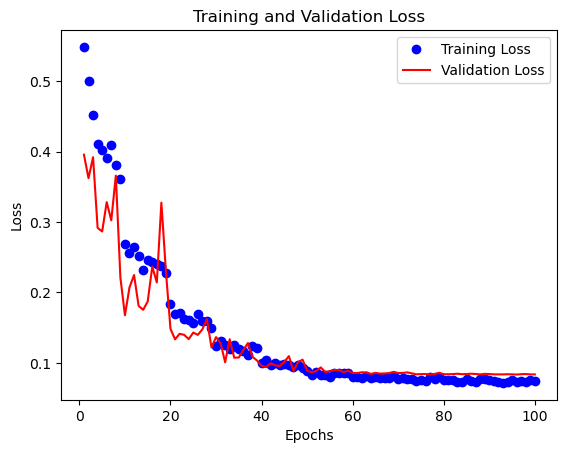

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [52]:
# Plot the train/val loss
plt.plot(epochs, training_loss, 'bo', label="Training Loss")
plt.plot(epochs, validation_loss, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.figure()

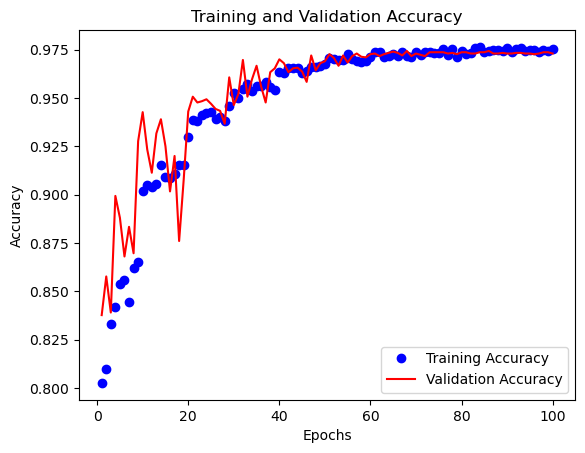

In [53]:
# Plot the train/val accuracy
plt.plot(epochs, training_accuracy, 'bo', label="Training Accuracy")
plt.plot(epochs, validation_accuracy, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import classification_report, f1_score

y_pred = cnn_model.predict(X_val_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Calculate classification report
report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", report)

# Calculate F1 Score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print("Weighted F1 Score:", f1)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       491
           1       0.96      0.99      0.98       298
           2       0.95      0.95      0.95       168
           3       0.98      0.98      0.98       241
           4       0.95      0.99      0.97       135
           5       0.98      0.96      0.97       196
           6       0.98      0.90      0.94       156
           7       0.96      0.98      0.97       240
           8       0.93      0.78      0.85        18
           9       0.95      0.94      0.95        85
          10       0.94      0.95      0.95       111
          11       0.97      0.99      0.98       225
          12       0.99      1.00      0.99       600
          13       0.90      0.97      0.93        36

    accuracy                           0.97      3000
   macro avg       0.96      0.95      0.96      3000
weighted avg   

In [55]:
cnn_model.save('/Users/VSR/Desktop/AIT.h5')